# Importing necessary libraries


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Importding cars data

In [4]:
cars = pd.read_csv('car data.csv')

In [5]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Dimensions of dataset

In [7]:
print(f'No of rows = {cars.shape[0]}')

print(f'No of cols = {cars.shape[1]}')

No of rows = 301
No of cols = 9


# Missing values

In [9]:
print(f'Null values = {cars.isnull().any().sum()}')

Null values = 0


# Duplicate values

In [11]:
print(f'Duplicate values = {cars.duplicated().sum()}')

Duplicate values = 2


- Total 2 duplicated records found
- Removing duplicates

In [13]:
cars = cars.drop_duplicates()
cars.duplicated().sum()

0

# Unique values

In [15]:
cars.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

# Columns or features

In [17]:
print(cars.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


# Statistical Analysis

In [19]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [20]:
cars.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# EDA

In [22]:
cars_num = cars.select_dtypes(exclude='object')

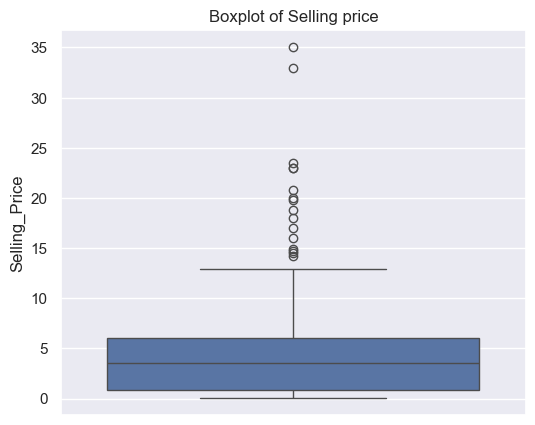

In [23]:
plt.figure(figsize=(6,5))

sns.boxplot(y=cars_num['Selling_Price'])

plt.title('Boxplot of Selling price')
plt.show()

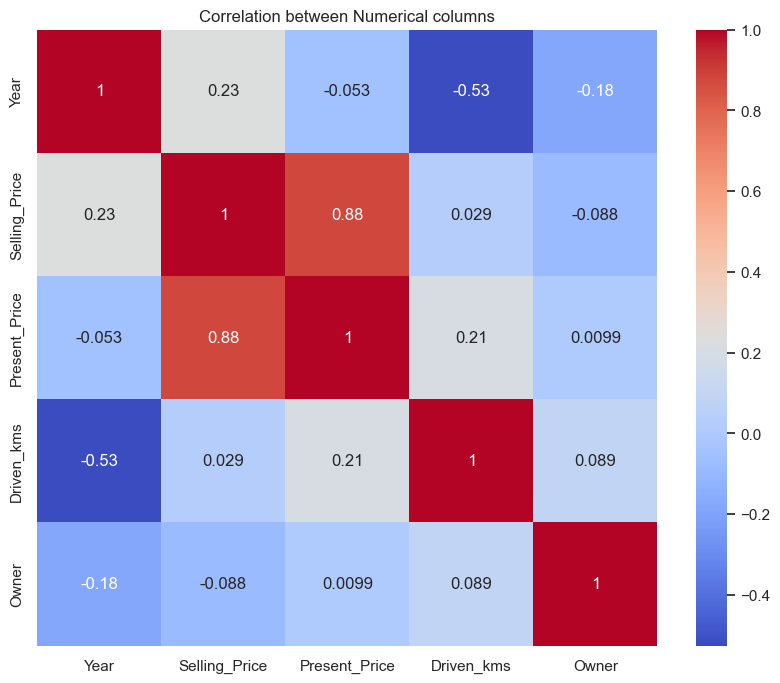

In [24]:
plt.figure(figsize=(10,8))

sns.heatmap(cars_num.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation between Numerical columns')
plt.show()

In [25]:
def distplot(col):
    plt.figure(figsize=(6,4))
    
    sns.distplot(x=cars_num[col], kde=True, )
    plt.title(f'Distribution of {col}')
    plt.show()


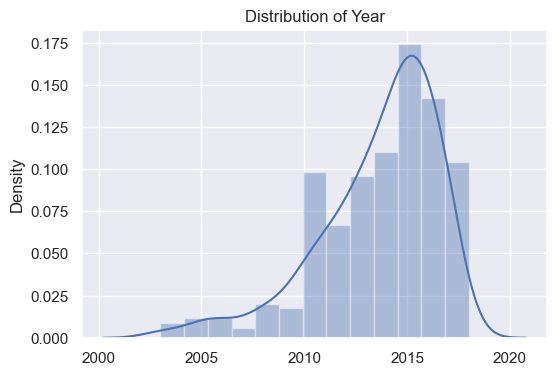

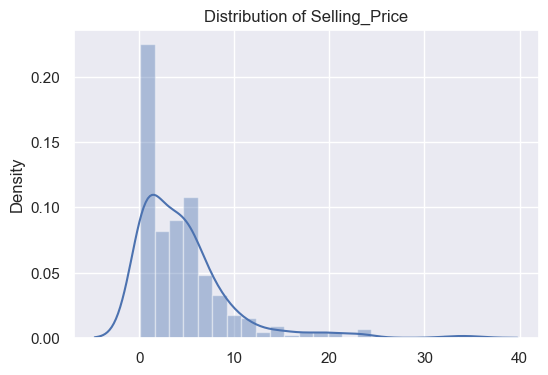

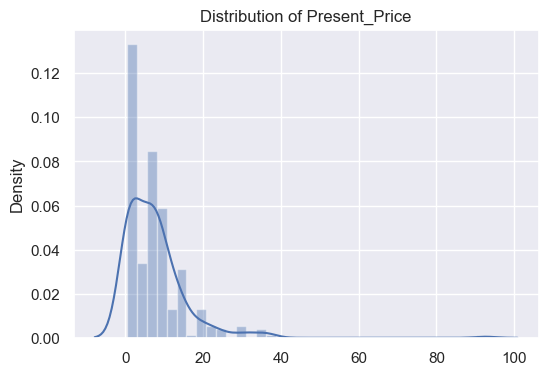

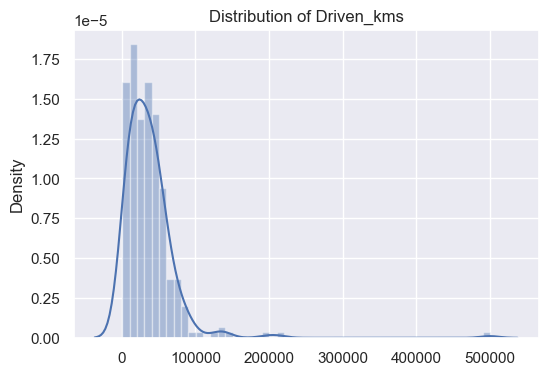

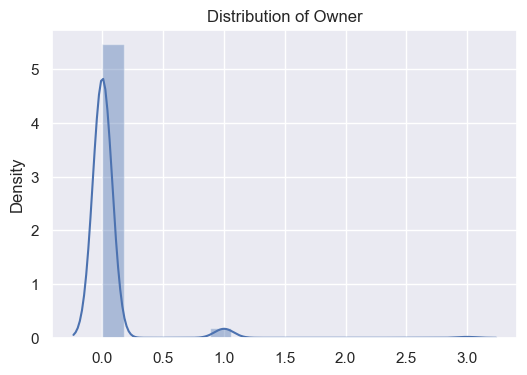

In [26]:
for col in cars_num.columns.to_list():
    distplot(col)

# Wordcloud of Car brand names

In [28]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white', colormap='gist_gray').generate(",".join(cars['Car_Name'].tolist()))

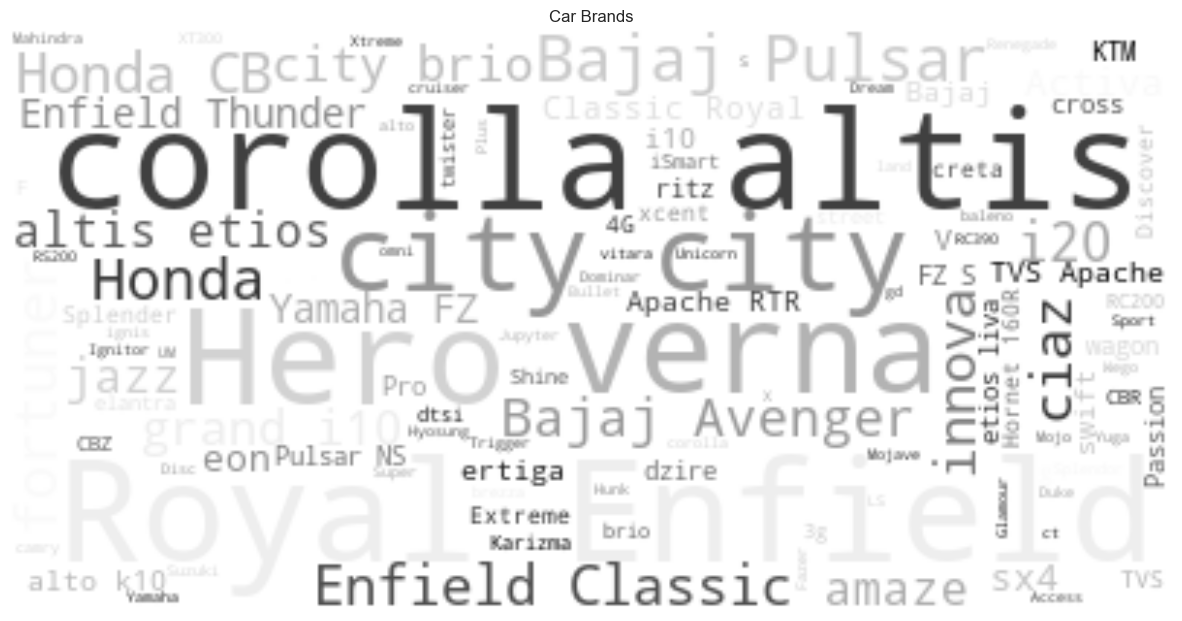

In [29]:

plt.figure(figsize=(15,12))

plt.imshow(wc, interpolation='bilinear')

plt.title('Car Brands')
plt.axis('off')
plt.show()

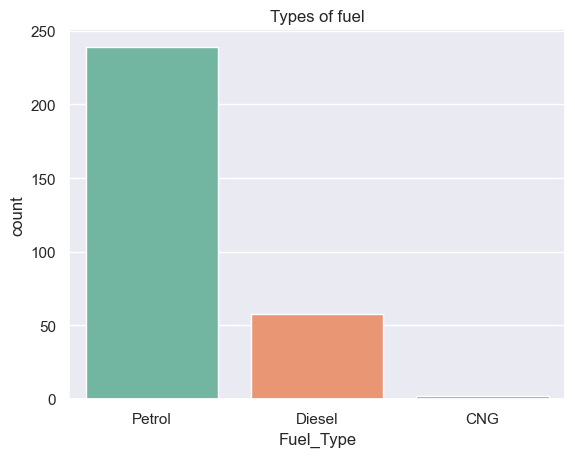

In [30]:
sns.countplot(data=cars, x='Fuel_Type',palette='Set2')

plt.title('Types of fuel')
plt.show()

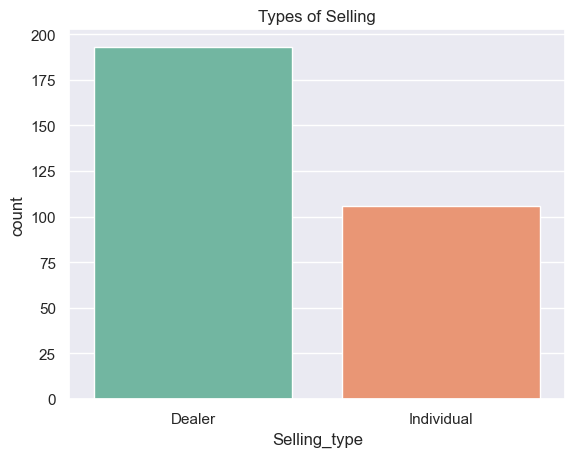

In [31]:
sns.countplot(data=cars, x='Selling_type',palette='Set2')

plt.title('Types of Selling')
plt.show()

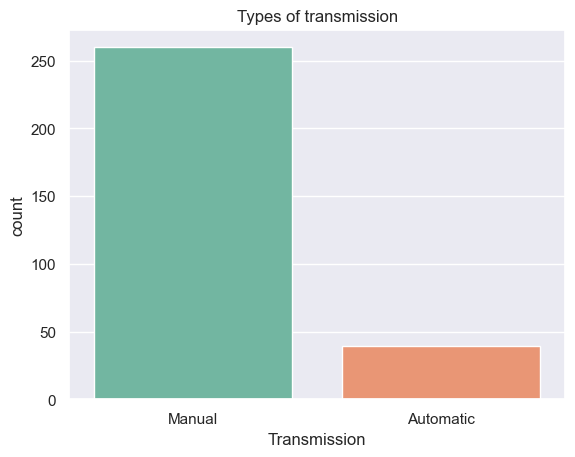

In [32]:
sns.countplot(data=cars, x='Transmission',palette='Set2')

plt.title('Types of transmission')
plt.show()

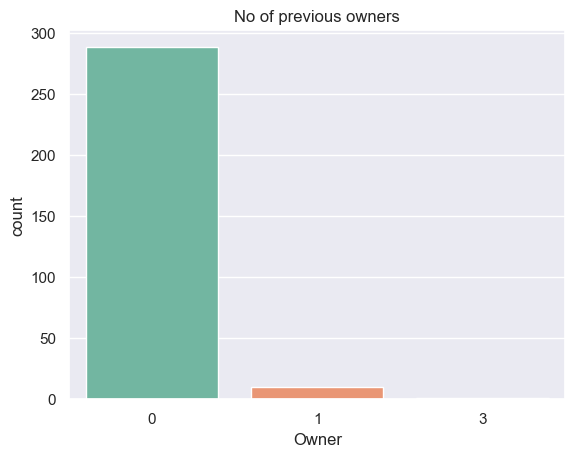

In [33]:
sns.countplot(data=cars, x='Owner',palette='Set2')

plt.title('No of previous owners')
plt.show()

# Converting categorical data types to numerical data for model building

In [35]:
fuel = sorted(cars['Fuel_Type'].unique().tolist())
cars['Fuel_Type'] = cars['Fuel_Type'].apply(lambda x: fuel.index(x))

In [36]:
sell = sorted(cars['Selling_type'].unique().tolist())
cars['Selling_type'] = cars['Selling_type'].apply(lambda x: sell.index(x))

In [37]:
trn = sorted(cars['Transmission'].unique().tolist())
cars['Transmission'] = cars['Transmission'].apply(lambda x: trn.index(x))

# Train Test split

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cars.drop(['Selling_Price', 'Car_Name'], axis=1),
                                                    cars['Selling_Price'], random_state=43, test_size=0.3)


In [40]:
print(f'x train dimensions = {x_train.shape}')
print(f'x test dimensions  = {x_test.shape}')
print(f'y train dimensions = {y_train.shape}')
print(f'y test dimensions  = {y_test.shape}')

x train dimensions = (209, 7)
x test dimensions  = (90, 7)
y train dimensions = (209,)
y test dimensions  = (90,)


In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [42]:
model.fit(x_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(x_test)

In [79]:
from sklearn.metrics import r2_score, mean_squared_error

print(f'R squared error = {r2_score(y_test, y_pred)}')

print(f'mean squared error = {mean_squared_error(y_test, y_pred)}')

R squared error = 0.8702776246159707
mean squared error = 2.69913190154095
